<a href="https://colab.research.google.com/github/anyaagarwal5/impact-on-socialmedia/blob/main/PROJECTFINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import re#cleaning
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression#for data analysis and modeling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV#is used for hyperparameter tuning using cross-validation.
from sklearn.feature_extraction.text import TfidfVectorizer# a method for converting a collection of raw documents to a matrix of TF-IDF features.
from sklearn.pipeline import make_pipeline
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW#is an optimization algorithm commonly used for training neural networks.
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset
import torch
from tqdm import tqdm


In [ ]:
# Function to clean text
def clean_text(text):
    # Remove subreddit and user mentions
    text = re.sub(r'r/[\S]+', '', text)
    text = re.sub(r'u/[\S]+', '', text)

    # Remove extra whitespace
    text = ' '.join(text.split())

    return text


In [ ]:
# Load comments from CSV file
csv_filename = '/content/drive/MyDrive/reddit_comments.csv'
data = pd.read_csv(csv_filename)


In [ ]:
# Remove entries with '[removed]' or '[deleted]'
data = data[data['Comment'] != '[removed]']
data = data[data['Comment'] != '[deleted]']

In [ ]:
# Convert comments to lowercase
data['Comment'] = data['Comment'].str.lower()

In [ ]:
# Display the DataFrame
print("Dataset:")
print(data)

Dataset:
                                                Comment          Label
0     this is me. don’t get me wrong, it’s better th...      depressed
1     but here i am, 24 years old man and doing exac...      depressed
2     i’m trapped inside. does anyone else get that ...      depressed
3     i read a lot of posts on here of people strugg...      depressed
4     thank you, that really helps. now i feel ten t...      depressed
...                                                 ...            ...
1735  recently, users in r/askreddit have received m...  non-depressed
1736  effective immediately until a further notice, ...  non-depressed
1737  like many of you, we are disgusted and appalle...  non-depressed
1738  happy new year! this is a megathread to discus...  non-depressed
1739  **random 25m facts:**\n\n*every year, around 2...  non-depressed

[1740 rows x 2 columns]


In [ ]:

 #Add a new column for comment lengths
data['Comment_Length'] = data['Comment'].apply(len)

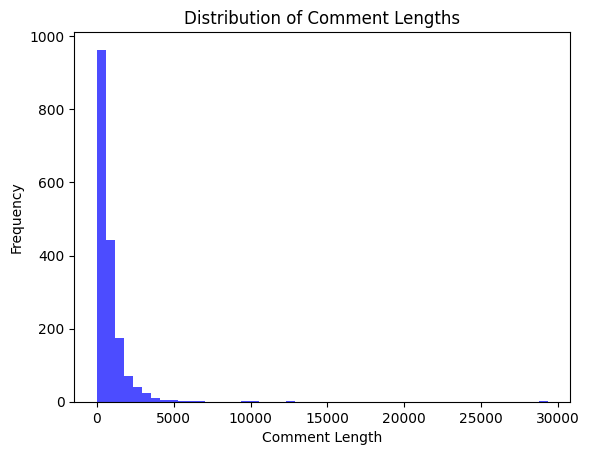

In [ ]:
# Add a histogram to visualize comment lengths
plt.hist(data['Comment_Length'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.show()

In [ ]:
# Count the occurrences of each sentiment
sentiment_counts = data['Label'].value_counts()

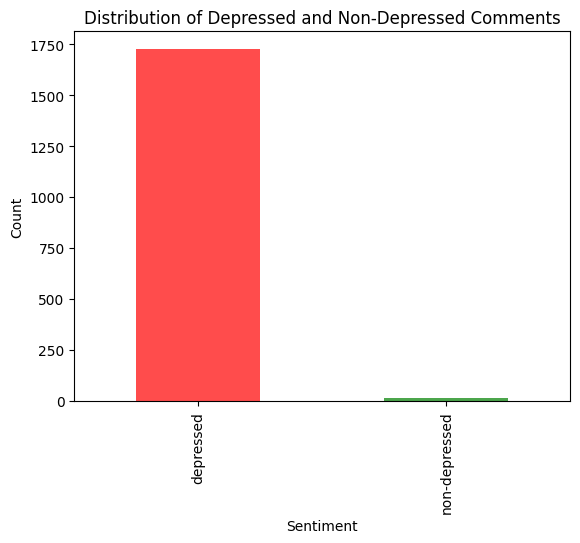

In [ ]:
# Add a bar plot to visualize depressed and non-depressed comments
colors = ['red' if label == 'depressed' else 'green' for label in sentiment_counts.index]
sentiment_counts.plot(kind='bar', color=colors, alpha=0.7)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Depressed and Non-Depressed Comments')
plt.show()

In [ ]:
# Split the data into training and testing sets train_test_split is a function from scikit-learn
X = data['Comment']
y = data['Label']  # Corrected the column name to 'Label'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# TF-IDF Vectorization(Term Frequency-Inverse Document Frequency) convert a collection of raw documents into a numerical representation
vectorizer = TfidfVectorizer(norm='l2', min_df=2)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
# Logistic Regression (Baseline Model)
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_tfidf, y_train)
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluate Logistic Regression
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, logistic_regression_predictions))


Logistic Regression Results:
Accuracy: 0.9913793103448276


In [ ]:

# Create and train the logistic regression model
logistic_regression_model = LogisticRegression(C=1, random_state=42)
logistic_regression_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)

# Precision, Recall, F1 Score for both classes
precision, recall, f1, _ = precision_recall_fscore_support(y_test, logistic_regression_predictions, labels=['depressed'], average=None, zero_division=1)
print("Precision (Depressed):", precision[0])
print("Recall (Depressed):", recall[0])
print("F1 Score (Depressed):", f1[0])


# Classification Report
print("Classification Report:\n", classification_report(y_test, logistic_regression_predictions))

Precision (Depressed): 0.9913793103448276
Recall (Depressed): 1.0
F1 Score (Depressed): 0.9956709956709957
Classification Report:
                precision    recall  f1-score   support

    depressed       0.99      1.00      1.00       345
non-depressed       0.00      0.00      0.00         3

     accuracy                           0.99       348
    macro avg       0.50      0.50      0.50       348
 weighted avg       0.98      0.99      0.99       348



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Support Vector Machine (LinearSVC) with different C value
svm_model = LinearSVC(C=1.0, class_weight='balanced', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_test_tfidf)

# Evaluate SVM
print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))



Support Vector Machine (SVM) Results:
Accuracy: 0.9942528735632183


In [ ]:
# Precision, Recall, F1 Score for both classes
precision, recall, f1, _ = precision_recall_fscore_support(y_test, svm_predictions, labels=['depressed', 'non-depressed'], average=None, zero_division=1)
print("Precision (Depressed):", precision[0])
print("Recall (Depressed):", recall[0])
print("F1 Score (Depressed):", f1[0])

print("Precision (Non-Depressed):", precision[1])
print("Recall (Non-Depressed):", recall[1])
print("F1 Score (Non-Depressed):", f1[1])

# Classification Report
print("Classification Report:\n", classification_report(y_test, svm_predictions))


Precision (Depressed): 0.9942363112391931
Recall (Depressed): 1.0
F1 Score (Depressed): 0.9971098265895955
Precision (Non-Depressed): 1.0
Recall (Non-Depressed): 0.3333333333333333
F1 Score (Non-Depressed): 0.5
Classification Report:
                precision    recall  f1-score   support

    depressed       0.99      1.00      1.00       345
non-depressed       1.00      0.33      0.50         3

     accuracy                           0.99       348
    macro avg       1.00      0.67      0.75       348
 weighted avg       0.99      0.99      0.99       348



In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_test_tfidf)

# Evaluate Random Forest
print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))


Random Forest Results:
Accuracy: 0.9913793103448276


In [ ]:
# Precision, Recall, F1 Score for both classes
precision, recall, f1, _ = precision_recall_fscore_support(y_test, rf_predictions, labels=['depressed', 'non-depressed'], average=None, zero_division=1)
print("Precision (Depressed):", precision[0])
print("Recall (Depressed):", recall[0])
print("F1 Score (Depressed):", f1[0])



# Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, rf_predictions))

Precision (Depressed): 0.9913793103448276
Recall (Depressed): 1.0
F1 Score (Depressed): 0.9956709956709957
Classification Report:
                precision    recall  f1-score   support

    depressed       0.99      1.00      1.00       345
non-depressed       0.00      0.00      0.00         3

     accuracy                           0.99       348
    macro avg       0.50      0.50      0.50       348
 weighted avg       0.98      0.99      0.99       348



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Load pre-trained DistilBERT model and tokenizer
model_name = 'distilbert-base-uncased'
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize and encode the training set
tokens_train = tokenizer.batch_encode_plus(X_train.tolist(), max_length=256, pad_to_max_length=True, truncation=True, return_tensors='pt')
input_ids_train = tokens_train['input_ids']
attention_mask_train = tokens_train['attention_mask']
labels_train = torch.tensor(y_train.map({'depressed': 1, 'non-depressed': 0}).values)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Tokenize and encode the test set
tokens_test = tokenizer.batch_encode_plus(X_test.tolist(), max_length=256, pad_to_max_length=True, truncation=True, return_tensors='pt')
input_ids_test = tokens_test['input_ids']
attention_mask_test = tokens_test['attention_mask']
labels_test = torch.tensor(y_test.map({'depressed': 1, 'non-depressed': 0}).values)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
# Create DataLoader for training and testing sets
train_dataset = TensorDataset(input_ids_train, attention_mask_train, labels_train)
test_dataset = TensorDataset(input_ids_test, attention_mask_test, labels_test)

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



In [ ]:
# Set up GPU((Graphics Processing Unit))
#GPUs can perform these operations much faster than traditional CPUs, significantly reducing the time required for model training.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
# Set hyperparameters
epochs = 3
learning_rate = 1e-5
optimizer = AdamW(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()



/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Training
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in tqdm(train_dataloader, desc="Epoch {}".format(epoch)):
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()


Epoch 0: 100%|██████████| 44/44 [34:31<00:00, 47.08s/it]


In [ ]:
# Testing
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Testing"):
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1]}
        labels = batch[2]
        outputs = model(**inputs)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


Testing: 100%|██████████| 11/11 [02:40<00:00, 14.61s/it]


In [ ]:
# Hyperparameters
learning_rate = 1e-5
batch_size = 32
num_train_epochs = 1  # You can adjust the number of epochs
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Tokenizer s the process of breaking down a sequence of text into individual units called tokens.
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Tokenize and encode the training set
tokens_train = tokenizer.batch_encode_plus(X_train.tolist(), max_length=128, pad_to_max_length=True, truncation=True, return_tensors='pt')
input_ids_train = tokens_train['input_ids']
attention_mask_train = tokens_train['attention_mask']
labels_train = torch.tensor(y_train.map({'depressed': 1, 'non-depressed': 0}).values)

# Create DataLoader for the training set
train_dataset = TensorDataset(input_ids_train, attention_mask_train, labels_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load DistillBERT model for sequence classification
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.to(device)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.bias', 'classifier.weight', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
#The fine-tuning process involved training the DistillBert model for specific classification
#tasks over a set number of epochs. The model’s gradient was then updated to minimize the loss. The
#whole process was monitored using tqdm library.
# Fine-tuning
optimizer = AdamW(model.parameters(), lr=learning_rate)

for epoch in range(num_train_epochs):
    model.train()
    total_loss = 0
    tqdm_dataloader = tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{num_train_epochs}", leave=False)

    for batch in tqdm_dataloader:
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        tqdm_dataloader.set_postfix({'loss': total_loss / len(tqdm_dataloader)})

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Tokenize and encode the test set
tokens_test = tokenizer.batch_encode_plus(X_test.tolist(), max_length=128, pad_to_max_length=True, truncation=True, return_tensors='pt')
input_ids_test = tokens_test['input_ids']
attention_mask_test = tokens_test['attention_mask']
labels_test = torch.tensor(y_test.map({'depressed': 1, 'non-depressed': 0}).values)

# Create DataLoader for the test set
test_dataset = TensorDataset(input_ids_test, attention_mask_test, labels_test)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Evaluation
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        batch = tuple(t.to(device) for t in batch)
        inputs = {'input_ids': batch[0], 'attention_mask': batch[1], 'labels': batch[2]}
        outputs = model(**inputs)
        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        all_preds.extend(predictions.cpu().numpy())
        all_labels.extend(batch[2].cpu().numpy())

# Calculate and print accuracy
accuracy = accuracy_score(all_labels, all_preds)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Evaluating: 100%|██████████| 11/11 [01:25<00:00,  7.78s/it]

Accuracy: 0.9913793103448276


In [ ]:
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary', pos_label=1)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Classification Report
print("Classification Report:\n", classification_report(all_labels, all_preds))


Precision: 0.9913793103448276
Recall: 1.0
F1 Score: 0.9956709956709957
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.99      1.00      1.00       345

    accuracy                           0.99       348
   macro avg       0.50      0.50      0.50       348
weighted avg       0.98      0.99      0.99       348



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

# Get user input
user_input = input("Enter a Reddit comment: ")

# Preprocess user input
processed_input = clean_text(user_input)

# Transform input using TF-IDF Vectorizer
input_features_tfidf = vectorizer.transform([processed_input])

# Predict with Logistic Regression
logistic_prediction = logistic_regression_model.predict(input_features_tfidf)
print("Logistic Regression Prediction:", "Depressed" if logistic_prediction == 'depressed' else "Non-Depressed")

# Predict with SVM
svm_prediction = svm_model.predict(input_features_tfidf)
print("SVM Prediction:", "Depressed" if svm_prediction == 'depressed' else "Non-Depressed")
# Tokenize and pad the input for DistilBERT
input_tokenized = tokenizer([processed_input], padding=True, truncation=True, return_tensors='pt', max_length=128)

# Predict with DistilBERT
input_ids = input_tokenized['input_ids'].to(device)
attention_mask = input_tokenized['attention_mask'].to(device)
bert_outputs = model(input_ids, attention_mask=attention_mask)
logits = bert_outputs.logits
bert_prediction = torch.argmax(logits, dim=1).item()
print("DistilBERT Prediction:", "Depressed" if bert_prediction == 1 else "Non-Depressed")

Enter a Reddit comment: I just wish so much that the knot held, life just isnt for some people.
Logistic Regression Prediction: Depressed
SVM Prediction: Depressed
DistilBERT Prediction: Depressed


In [ ]:

# Get user input
user_input = input("Enter a Reddit comment: ")

# Preprocess user input
processed_input = clean_text(user_input)

# Transform input using TF-IDF Vectorizer
input_features_tfidf = vectorizer.transform([processed_input])

svm_prediction = svm_model.predict(input_features_tfidf)
print(" Prediction:", "Depressed" if svm_prediction == 'depressed' else "Non-Depressed")
# Tokenize and pad the input for DistilBERT
input_tokenized = tokenizer([processed_input], padding=True, truncation=True, return_tensors='pt', max_length=128)


Enter a Reddit comment: Like many of you, we are disgusted and appalled by the allegations that have come to light recently regarding Aimee Challenor.  We are not planning on shutting down r/AskReddit, as other subreddits have been doing, because we think that continuing to provide a forum for discussion is valuable.  We hope that the admins will be more forthcoming with information about the situation - we're currently as in the dark as everybody else is.
 Prediction: Non-Depressed
